<a href="https://colab.research.google.com/github/shaheerzubery/DataCleaning/blob/main/EDA_YOUTUBE_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#let's import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#let import the data
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head()

In [ ]:
#let's rremove some unwanted clumns
df = df.drop(['Content Owner ID','Content Owner Name','Video ID'], axis = 1)

In [ ]:
#now check for null values
df

,Date,Estimated Revenue,Views,Comments,Likes,Dislikes,Shares,Subscribers Gained,Subscribers Lost,Estimated Minutes Watched,Launch Date
0,2019-11,11.579,18287,0,38,16,14,12,7,24454,2019-11
1,2019-12,35.249,51485,3,104,53,37,29,5,74164,2019-11
2,2020-01,3.106,14410,1,26,10,7,9,5,23257,2019-11
3,2020-02,18.925,87610,0,265,163,8,60,10,139788,2019-11
4,2020-03,7.123,30938,0,76,63,0,14,1,48212,2019-11
...,...,...,...,...,...,...,...,...,...,...,...
17023,2022-08,49.904,125927,0,152,68,28,144,27,165166,2022-03
17024,2022-09,16.790,49300,0,57,21,18,28,7,52325,2022-03
17025,2022-10,10.390,29819,0,27,12,10,10,1,29593,2022-03
17026,2022-11,10.706,27761,0,5,6,5,15,8,27160,2022-03


In [ ]:
df_null = df.apply(lambda x: sum(x.isnull())).to_frame(name = 'count')
print(df_null)

                           count
Video ID                       0
Date                           0
Estimated Revenue              0
Views                          0
Comments                       0
Likes                          0
Dislikes                       0
Shares                         0
Subscribers Gained             0
Subscribers Lost               0
Estimated Minutes Watched      0
Launch Date                    0


In [ ]:
#you can do it in a simple way as well
df.isnull().sum()

Video ID                     0
Date                         0
Estimated Revenue            0
Views                        0
Comments                     0
Likes                        0
Dislikes                     0
Shares                       0
Subscribers Gained           0
Subscribers Lost             0
Estimated Minutes Watched    0
Launch Date                  0
dtype: int64

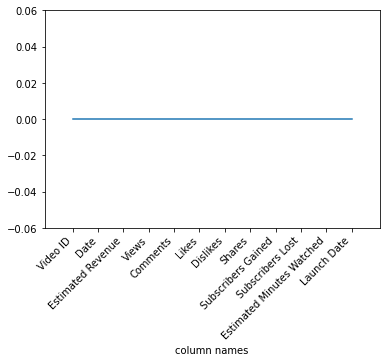

In [ ]:
#now let's plot it as well
plt.plot(df_null.index, df_null['count'])
plt.xticks(df_null.index,df_null.index, rotation = 45, 
horizontalalignment = 'right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [ ]:
#let's check some unique ids as well

df_unique = pd.unique(df['Video ID'])

In [ ]:
df_unique

array(['WHIfP33bYhg', '8gzEfZnr4w8', 'YomsOLck0vQ', '1K2emXTQzRk',
       'OnMaI2QGxzM', '5ndWkrsHQTQ', 'Yx-on9ItFCA', 'eg6nkdDU3gQ',
       'H0XKpjHXRu4', 'cXxgUtWm3mg', 'Im6xAm2AhLk', 'r5OpbrwTwuQ',
       'xOWcbLdJ7eQ', '36qHNDCOpgY', 'v6CHa12QkQw', 'MKQc1ZkATpc',
       '6x5mi19qEME', 'W3MqVepY9Kg', 'QvVYw7Kd1-s', 'qb-qeDv5BhE',
       'yjFMmTI44UI', 'YIcGKzJhJxw', 'rPXzLvj5IOQ', '97Zebld_tsU',
       'Kr38xXF_C2o', 'qcmmvdQNU9A', 'iCct5TzePzM', 't7wlPwfFqms',
       't90wvbSTLio', 'mYK-zoE0ylI', 'BxdsFWDPh7U', 'I6e7UthglSM',
       '#NAME?', 'zR_zeGBJrgg', 'r7dZjux62g8', 'w8mA1MnRupA',
       '8Bx8wK1mHgY', 'HEH_OIKWnh4', 'IlCTxMfS3mk', 'GMOXuHyeHGI',
       'Cu9HuJtNebk', 'YzS2tLL8lPA', 'jf2yf2I2FnI', 'nTZXwd60_qE',
       '8kadk_iQBk4', 'tLWf0J8EVHw', 'abQm1QedTgk', 'ulef3b4JXIw',
       'QM3MRiPpRfU', '4-MiYSuMln8', 'uHAPcxYkgng', 'wJJh_5_cT3w',
       'QBIg33oYlwY', '0esHKiV4ACc', 'TEr_rPkKFJw', 'tNromGLvG2Y',
       'MNAFILyYbnU', 'OpOyYgO6V_Q', 'gsiMw90383A', 'Lv8ZF_EwEpU',


Check for the outliers

<AxesSubplot:>

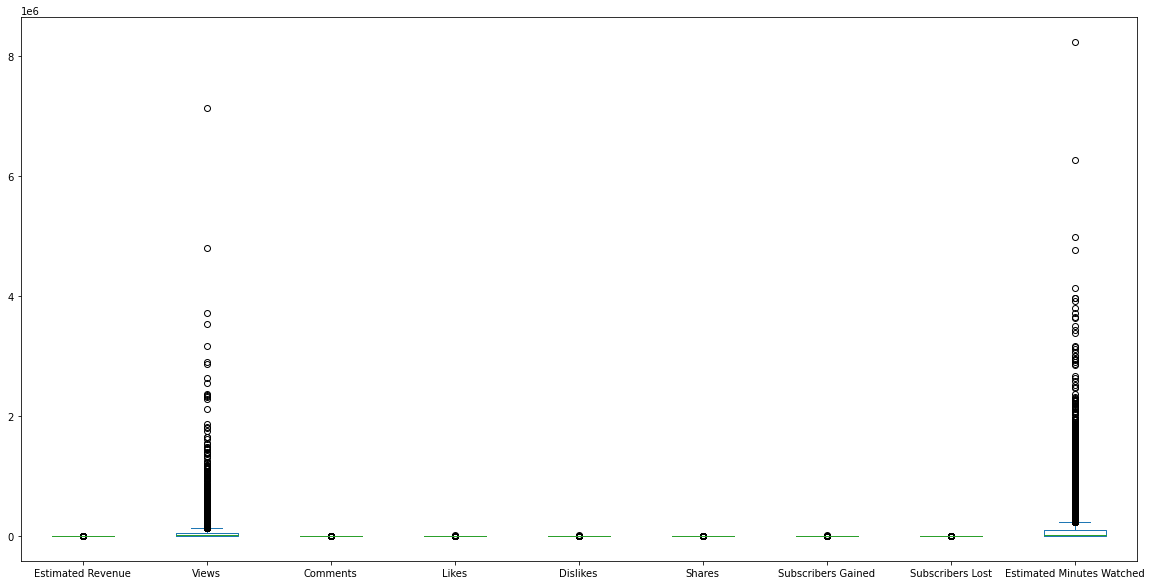

In [ ]:
df.plot(kind = "box", figsize = (20,10) )

you can see there are some outlier in view and watch time dataset

Let's check for correlation

In [ ]:
correlation = df.corr()
print(correlation)

                           Estimated Revenue     Views  Comments     Likes  \
Estimated Revenue                   1.000000  0.751045  0.152473  0.662905   
Views                               0.751045  1.000000  0.040534  0.877126   
Comments                            0.152473  0.040534  1.000000  0.052691   
Likes                               0.662905  0.877126  0.052691  1.000000   
Dislikes                            0.565321  0.807272  0.035036  0.979447   
Shares                              0.676443  0.601276  0.251087  0.442539   
Subscribers Gained                  0.708750  0.936155  0.042866  0.927286   
Subscribers Lost                    0.577817  0.701645  0.029550  0.479930   
Estimated Minutes Watched           0.911873  0.848065  0.029574  0.729095   

                           Dislikes    Shares  Subscribers Gained  \
Estimated Revenue          0.565321  0.676443            0.708750   
Views                      0.807272  0.601276            0.936155   
Comments    

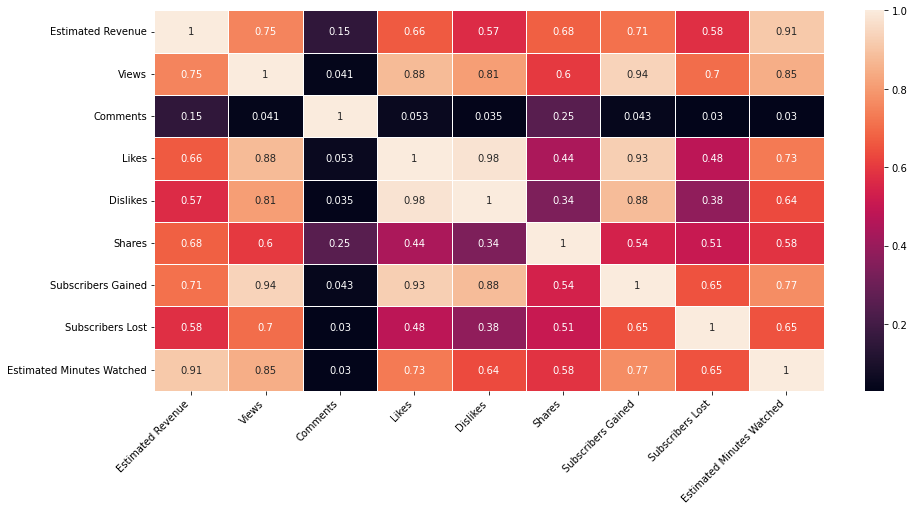

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(correlation, vmax = 1, annot = True, linewidths=.5)
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

You can see revenue majorly rely on watch time and views and comment has less impact based on this data

we will try to find more insight in the upcoming video

Last time we did some basic EDA, this time let's explore some Plots


In [ ]:
df

,Date,Estimated Revenue,Views,Comments,Likes,Dislikes,Shares,Subscribers Gained,Subscribers Lost,Estimated Minutes Watched,Launch Date
0,2019-11,11.579,18287,0,38,16,14,12,7,24454,2019-11
1,2019-12,35.249,51485,3,104,53,37,29,5,74164,2019-11
2,2020-01,3.106,14410,1,26,10,7,9,5,23257,2019-11
3,2020-02,18.925,87610,0,265,163,8,60,10,139788,2019-11
4,2020-03,7.123,30938,0,76,63,0,14,1,48212,2019-11
...,...,...,...,...,...,...,...,...,...,...,...
17023,2022-08,49.904,125927,0,152,68,28,144,27,165166,2022-03
17024,2022-09,16.790,49300,0,57,21,18,28,7,52325,2022-03
17025,2022-10,10.390,29819,0,27,12,10,10,1,29593,2022-03
17026,2022-11,10.706,27761,0,5,6,5,15,8,27160,2022-03


#Scatter Plot

<AxesSubplot:xlabel='Views', ylabel='Estimated Revenue'>

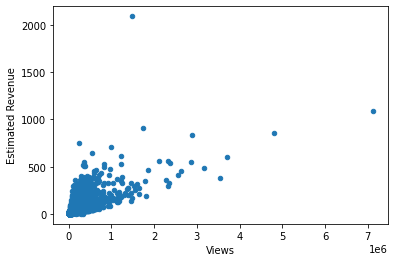

In [ ]:
df.plot.scatter(x = 'Views', y = 'Estimated Revenue')

This is how you can find the relation between 2 features

<AxesSubplot:xlabel='Estimated Minutes Watched', ylabel='Estimated Revenue'>

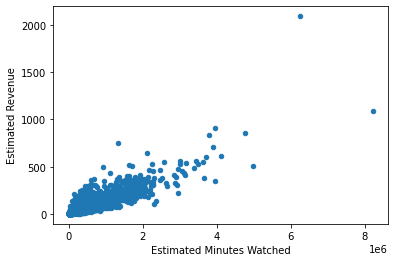

In [ ]:
df.plot.scatter(x = 'Estimated Minutes Watched', y = 'Estimated Revenue')

<AxesSubplot:xlabel='Date', ylabel='Estimated Revenue'>

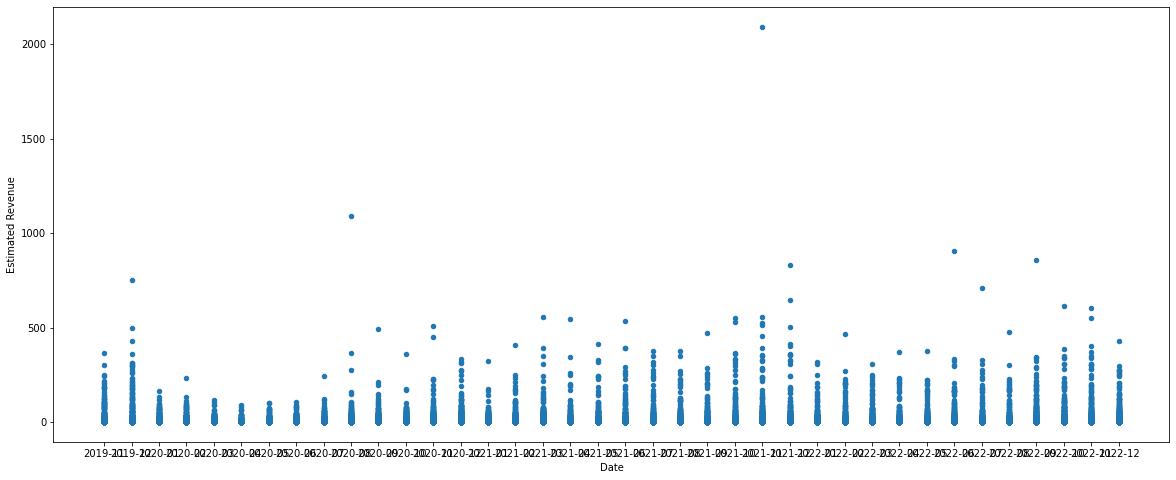

In [ ]:
df.plot.scatter(x = 'Date', y = 'Estimated Revenue', figsize = (20,8))

#Line Plot

<AxesSubplot:>

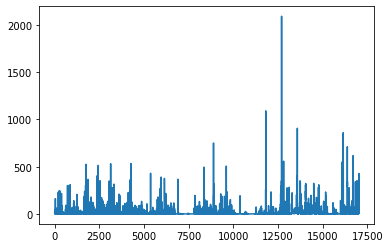

In [ ]:
df['Estimated Revenue'].plot(kind = 'line')


##Segmentation analysis:

Time series analysis: 
Analyze the trend of each feature over time and identify any patterns or seasonality in the data.


let's split the date column into 2

In [ ]:
df[["year", "month"]] = df["Date"].str.split("-", expand = True)

<AxesSubplot:xlabel='month'>

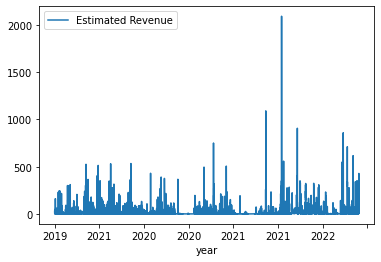

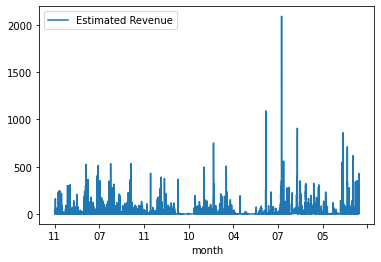

In [ ]:
df.plot(kind = 'line', x = 'year', y = 'Estimated Revenue')
df.plot(kind = 'line', x = 'month', y = 'Estimated Revenue')


This is how you can check most of the Revenue we got are in year 2021 and mnth 07

<AxesSubplot:xlabel='month'>

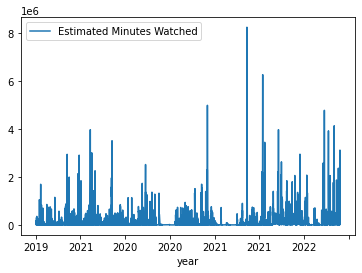

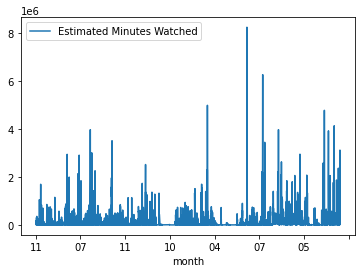

In [ ]:
df.plot(kind = 'line', x = 'year', y = 'Estimated Minutes Watched')
df.plot(kind = 'line', x = 'month', y = 'Estimated Minutes Watched')


This is how you can find the segmentation of each feature